In [1]:
"""Import the required modules"""
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy.linalg import pinv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

Analyzing welding data by welding types

In [2]:
df2 = pd.read_csv('welding_data_by_welding_types.csv')
df2 = pd.get_dummies(df2).drop('welding_type_GMAW', axis=1)
df2 = df2[['current', 'voltage', 'welding_speed', 'plate_thickness',	'welding_type_SAW',	'welding_type_SMAW',	              'welding_type_GTAW', 'flexural_strength', 'hardness_value', 'residual_stress',
           'tensile_strength']]
df2.head()

,current,voltage,welding_speed,plate_thickness,welding_type_SAW,welding_type_SMAW,welding_type_GTAW,flexural_strength,hardness_value,residual_stress,tensile_strength
0,160,32,120,6,0,0,1,236.2,102.5,152.0,432.6
1,130,32,90,8,0,1,0,270.2,96.4,270.2,332.8
2,100,28,120,8,0,0,1,360.8,86.4,90.5,382.4
3,160,28,90,10,0,0,1,230.0,105.0,165.4,422.8
4,100,28,120,8,1,0,0,276.5,128.4,186.6,385.5


Exploratory data analysis

	Current vs Response values


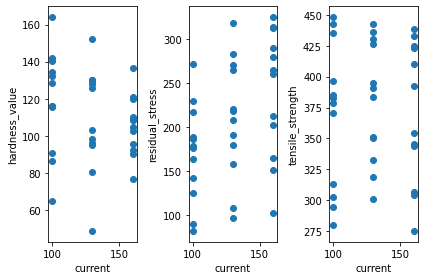



	Voltage vs Response values


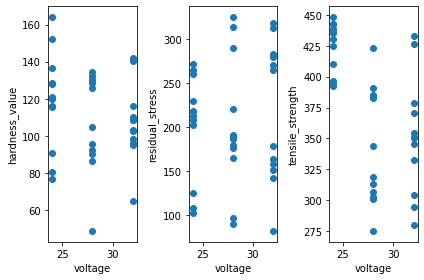



	Welding_speed vs Response values


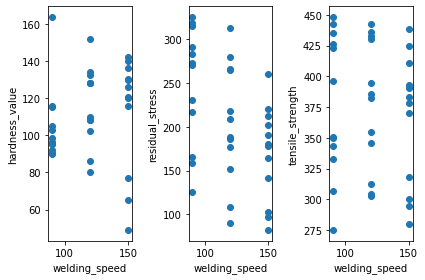



	Plate_thickness vs Response values


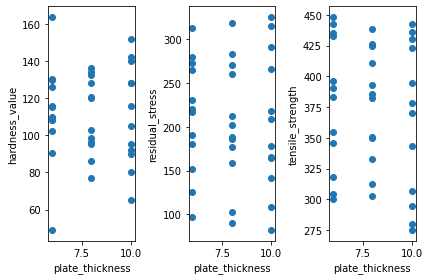

In [3]:
pos = 1
for i in range(4):
  print(f'\t{df2.columns[i].capitalize()} vs Response values')
  plt.figure()
  for j in range(8, 11):
    plt.subplot(1, 3, pos)
    plt.scatter(df2.iloc[:, i], df2.iloc[:, j])
    plt.ylabel(df2.columns[j])
    plt.xlabel(df2.columns[i])
    pos += 1
  plt.tight_layout()
  plt.show()
  print('\n')
  pos = 1

Generate the necessary variables for modeling

In [4]:
X1 = df2.iloc[:, :7]
X = X1.to_numpy()
y1 = df2.iloc[:, -4:]
y = y1.to_numpy()

In [5]:
def relu(x):
   return np.maximum(x, 0, x)

In [6]:
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H

In [7]:
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

Predicting individual response separately to optimize prediction

In [38]:
# Split data in readiness for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# Convert test data to dataframe and print it.
y_test_df = pd.DataFrame(y_test, columns=['flexural_strength',	'hardness_value',	'residual_stress',	'tensile_strength'])
print('Expected Data')
print(f'{y_test_df}\n')

# Run ELM for 5, 10, 15, 20, 25, 30 nodes.
print('ELM MATRICS')
for hidden_size in range(5, 35, 5):
  print(f'For nodes {int(h)}')
  # ELM Calculations.
  e_tic = time.perf_counter()
  input_size = X_train.shape[1]
  input_weights = np.random.normal(size=[input_size,hidden_size])
  biases = np.random.normal(size=[hidden_size])
  output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)
  prediction = predict(X_test)
  prediction_df = pd.DataFrame(prediction, columns=['flexural_strength',	'hardness_value',	'residual_stress',	'tensile_strength'])
  e_toc = time.perf_counter()

  print(f'{prediction_df}')
  

    # # ANN calculations
    # a_tic = time.perf_counter()
    # sc_X = StandardScaler()
    # X_trainscaled=sc_X.fit_transform(X_train)
    # X_testscaled=sc_X.transform(X_test)
    # reg = MLPRegressor(hidden_layer_sizes=(h,h,h),activation="relu" ,random_state=1, max_iter=1000000).fit(X_trainscaled, y_train)
    # y_pred=reg.predict(X_testscaled)
    # a_tic = time.perf_counter()

    # print(f'Metrics for Response variable, {y1.columns[i].capitalize()}:')

    # print(f'E_Exp\t\tE_Pre\t\tA_Pre')
    # for j in range(len(y_test)):
    #   print(f'{y_test[j]}\t{prediction[j]}\t{y_pred}')

    # print(f'R^2: {(r2_score(prediction, y_test))}')
    # print(f'rmse: {np.sqrt(mean_squared_error(y_test, prediction))}')
    # print(f'mae: {(mean_absolute_error(y_test, prediction))}\n')
    # print(f'Time: {')

Expected Data
   flexural_strength  hardness_value  residual_stress  tensile_strength
0              218.4           132.5            188.6             312.8
1              238.4           116.2            216.8             442.6
2              336.8            90.6            125.8             396.5
3              230.0           105.0            165.4             422.8
4              196.0           142.2            164.0             280.2
5              260.0           110.0            264.6             304.2
6              345.0            80.5            108.6             394.6
7              394.4            65.0             82.0             378.5

ELM MATRICS
For nodes 30
   flexural_strength  hardness_value  residual_stress  tensile_strength
0         253.108398      110.509756       167.180148        338.448635
1         220.293854       89.995859       180.803281        292.267510
2         224.164729       91.693882       182.524786        296.252108
3         268.279609    